In [23]:
import polars
from matplotlib import pyplot as plt, set_loglevel

from src.common.paths import ExperimentPath, PlotPaths
from src.plotting.plot_settings import (
    PLOT_WIDTH,
    PLOT_HEIGHT,
    LEGEND_FONT_SIZE,
    GRID_LINE_WIDTH,
    LABEL_FONT_SIZE,
    PLOT_LINE_OPTIONS,
)

set_loglevel("error")

In [24]:
gaussian_plume_snr_plot_path = PlotPaths.PLOTS / "snr_plots"
gaussian_plume_snr_plot_path.mkdir(exist_ok=True, parents=True)

In [25]:
CITY = "munich"

In [26]:
experiment_path = ExperimentPath("gaussian_plume_snr")

least_squares =  polars.read_csv(experiment_path.path / CITY / "ls.csv")
bp_dwt = polars.read_csv(experiment_path.path / CITY / "dwt.csv")
bp_dct = polars.read_csv(experiment_path.path / CITY / "dct.csv")
gen_2048 =  polars.read_csv(experiment_path.path / CITY / "2048.csv")
gen_2048_fine_tuned = polars.read_csv(experiment_path.path / CITY / f"2048_{CITY}.csv")

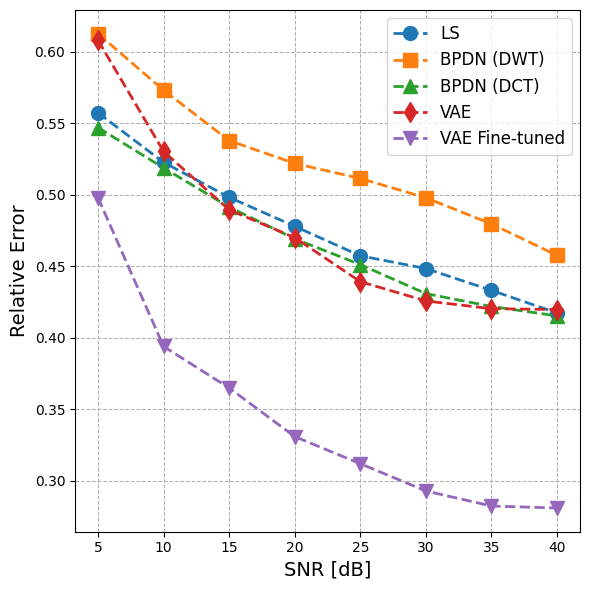

In [27]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

metric = "relative_error"

ax.plot(least_squares["snr_db"], least_squares[metric], label="LS", marker="o", **PLOT_LINE_OPTIONS)
ax.plot(bp_dwt["snr_db"], bp_dwt[metric], label="BPDN (DWT)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(bp_dct["snr_db"], bp_dct[metric], label="BPDN (DCT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(gen_2048["snr_db"], gen_2048[metric], label="VAE", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(gen_2048_fine_tuned["snr_db"], gen_2048_fine_tuned[metric], label="VAE Fine-tuned", marker="v", **PLOT_LINE_OPTIONS)

plt.xlabel("SNR [dB]", fontsize=LABEL_FONT_SIZE)
plt.ylabel("Relative Error", fontsize=LABEL_FONT_SIZE)
plt.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
plt.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)

plt.tight_layout()
plt.savefig(gaussian_plume_snr_plot_path / f"{CITY}_{metric}.eps", format="eps", bbox_inches="tight")

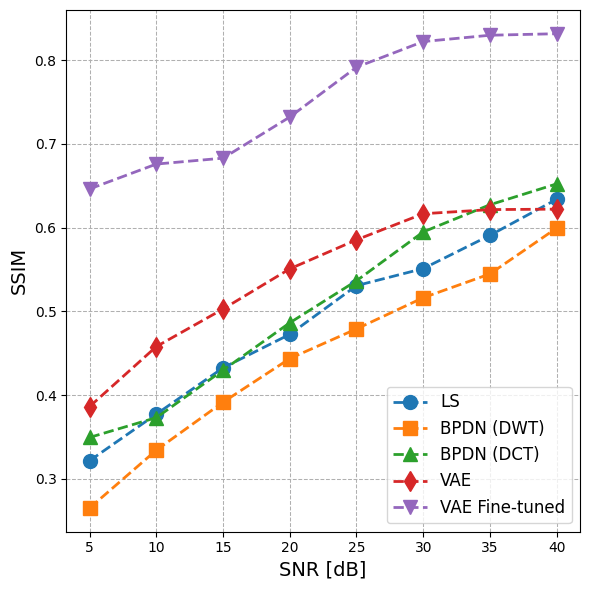

In [28]:
_, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))

metric = "ssim"

ax.plot(least_squares["snr_db"], least_squares[metric], label="LS", marker="o", **PLOT_LINE_OPTIONS)
ax.plot(bp_dwt["snr_db"], bp_dwt[metric], label="BPDN (DWT)", marker="s", **PLOT_LINE_OPTIONS)
ax.plot(bp_dct["snr_db"], bp_dct[metric], label="BPDN (DCT)", marker="^", **PLOT_LINE_OPTIONS)
ax.plot(gen_2048["snr_db"], gen_2048[metric], label="VAE", marker="d", **PLOT_LINE_OPTIONS)
ax.plot(gen_2048_fine_tuned["snr_db"], gen_2048_fine_tuned[metric], label="VAE Fine-tuned", marker="v", **PLOT_LINE_OPTIONS)

plt.xlabel("SNR [dB]", fontsize=LABEL_FONT_SIZE)
plt.ylabel("SSIM", fontsize=LABEL_FONT_SIZE)
plt.legend(loc="best", fontsize=LEGEND_FONT_SIZE)
plt.grid(True, which="both", ls="--", linewidth=GRID_LINE_WIDTH)

plt.tight_layout()
plt.savefig(gaussian_plume_snr_plot_path / f"{CITY}_{metric}.eps", format="eps", bbox_inches="tight")